In [1]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv(r"C:\Users\deepak.mukati\OneDrive\Desktop\Internship\Malignant Comments Classifier Project\train.csv")
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv(r"C:\Users\deepak.mukati\OneDrive\Desktop\Internship\Malignant Comments Classifier Project\test.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
df = pd.concat([df_test, df_train])
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,NaN,NaN,NaN,NaN,NaN,NaN
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,NaN,NaN,NaN,NaN,NaN,NaN
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",NaN,NaN,NaN,NaN,NaN,NaN
3,00017563c3f7919a,":If you have a look back at the source, the in...",NaN,NaN,NaN,NaN,NaN,NaN
4,00017695ad8997eb,I don't anonymously edit articles at all.,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Checking for null values 
df.isnull().sum()

id                       0
comment_text             0
malignant           153164
highly_malignant    153164
rude                153164
threat              153164
abuse               153164
loathe              153164
dtype: int64

In [6]:
#We can handle missing data by filling them with 'No Review' using fillna()
df['malignant'].fillna(0,inplace=True)
df.isnull().sum() 

id                       0
comment_text             0
malignant                0
highly_malignant    153164
rude                153164
threat              153164
abuse               153164
loathe              153164
dtype: int64

In [7]:
df['malignant'].fillna(0,inplace=True)
df.isnull().sum() 

id                       0
comment_text             0
malignant                0
highly_malignant    153164
rude                153164
threat              153164
abuse               153164
loathe              153164
dtype: int64

In [8]:
df['highly_malignant'].fillna(0,inplace=True)
df.isnull().sum() 

id                       0
comment_text             0
malignant                0
highly_malignant         0
rude                153164
threat              153164
abuse               153164
loathe              153164
dtype: int64

In [9]:
df['rude'].fillna(0,inplace=True)
df.isnull().sum() 

id                       0
comment_text             0
malignant                0
highly_malignant         0
rude                     0
threat              153164
abuse               153164
loathe              153164
dtype: int64

In [10]:
df['threat'].fillna(0,inplace=True)
df.isnull().sum() 

id                       0
comment_text             0
malignant                0
highly_malignant         0
rude                     0
threat                   0
abuse               153164
loathe              153164
dtype: int64

In [11]:
df['loathe'].fillna(0,inplace=True)
df.isnull().sum() 

id                       0
comment_text             0
malignant                0
highly_malignant         0
rude                     0
threat                   0
abuse               153164
loathe                   0
dtype: int64

In [12]:
df['abuse'].fillna(0,inplace=True)
df.isnull().sum() 

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [13]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312735 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                312735 non-null  object 
 1   comment_text      312735 non-null  object 
 2   malignant         312735 non-null  float64
 3   highly_malignant  312735 non-null  float64
 4   rude              312735 non-null  float64
 5   threat            312735 non-null  float64
 6   abuse             312735 non-null  float64
 7   loathe            312735 non-null  float64
dtypes: float64(6), object(2)
memory usage: 21.5+ MB


In [14]:
df_train.shape    #Checking the dimensions of the dataset

(159571, 8)

In [15]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [16]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [17]:
df_train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [18]:
df_train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [19]:
df_train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [20]:
df_train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

From the above observations, we can see that its an imbalanced dataset and we need to handle them

In [21]:
#Loading test data
 
df_test.head() 

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Exploratory Data Analysis


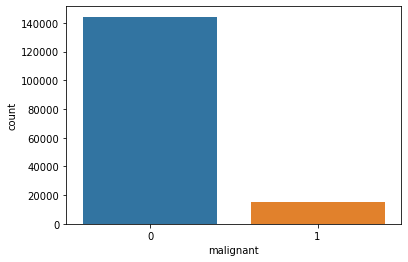

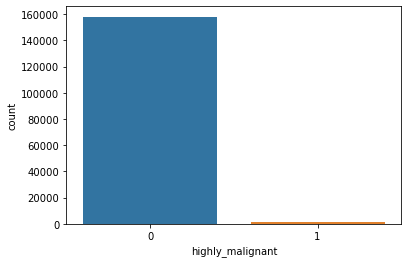

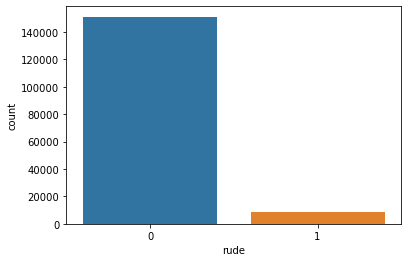

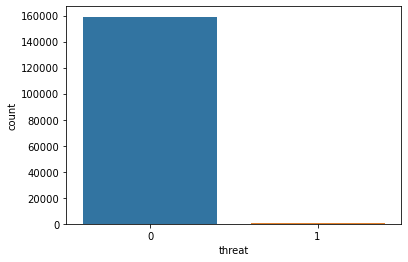

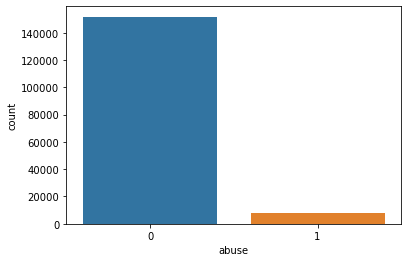

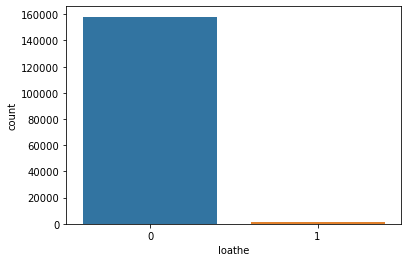

In [22]:
#Plotting countplot for all the features
categories=df_train.columns[2:]
for col in categories:
    sns.countplot(df_train[col])
    plt.show()
    

In [23]:
#Checking the percentage of the comments
none = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(none)/len(df_train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


In [24]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,2:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

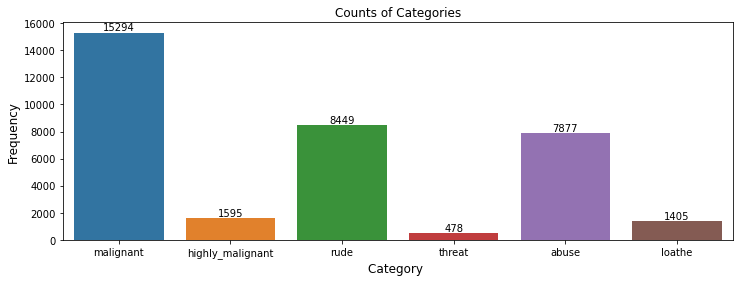

In [25]:
#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


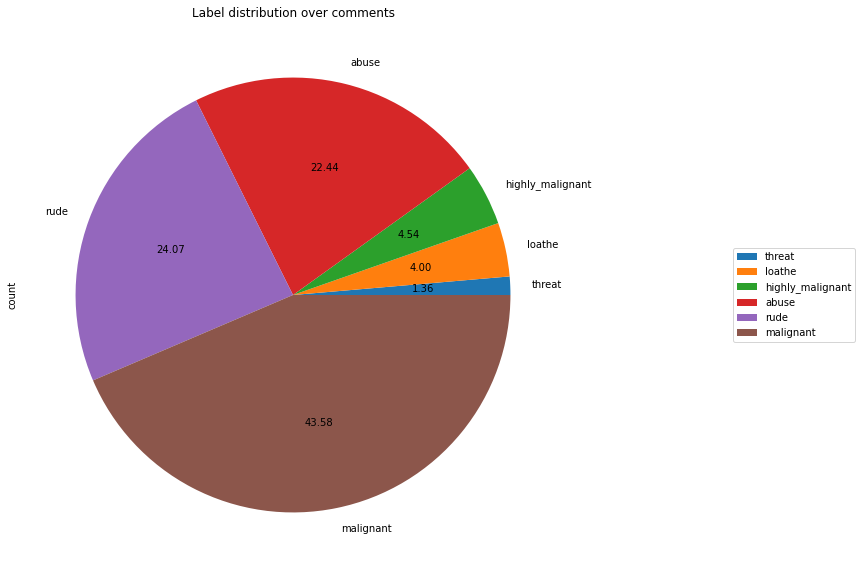

In [26]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

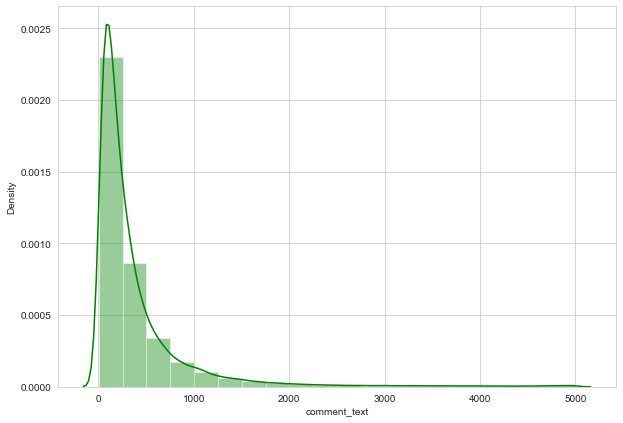

In [27]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

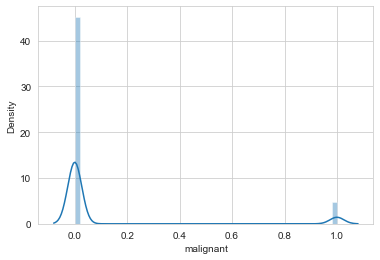

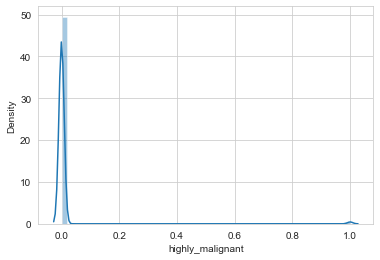

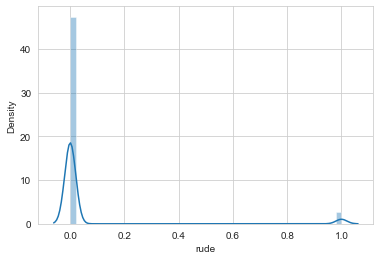

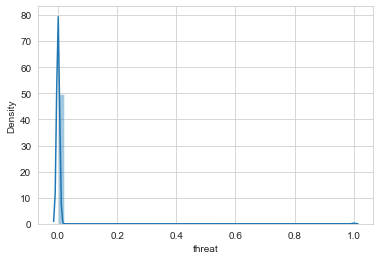

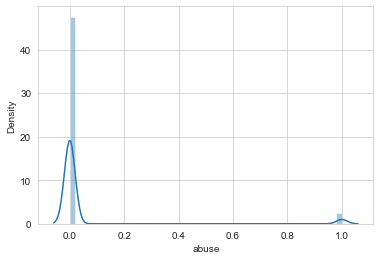

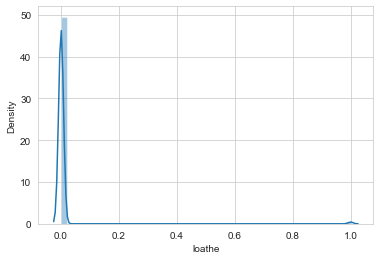

In [28]:
#Plotting distplot for checking the distribution of data
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()


In [29]:
df_train.describe()   

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


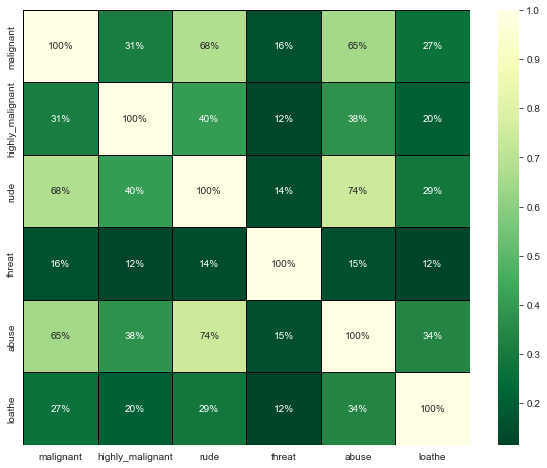

In [31]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='YlGn_r',annot=True)
plt.show()

In [32]:
#As ID is not much important, we can drop from the dataset
df.drop(columns=['id'],inplace=True)

Data pre-processing

In [33]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_train[comments_labels].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [34]:
df_train['label']=df_train[comments_labels].sum(axis=1)
df_train.head(10)  #Checking the dataset after adding it

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


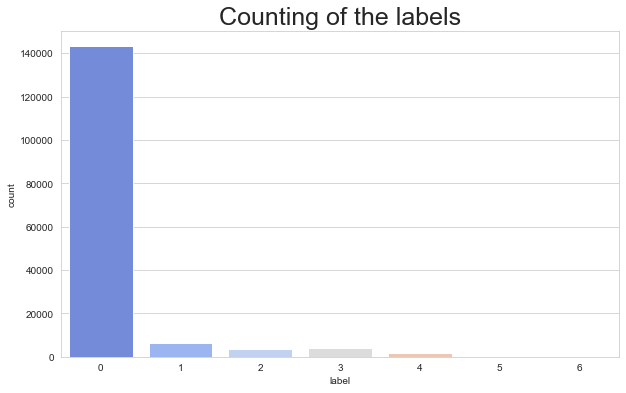

In [35]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df_train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [36]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [37]:
#We can see that 0 has more number of weightage, whereas 6 has the lesser weightage

#Scaling the label column
df_train['label'] = df_train['label'] >0
df_train['label'] = df_train['label'].astype(int)
df_train.head(15)    #Checking the data after scaling

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143346
1     16225
Name: label, dtype: int64


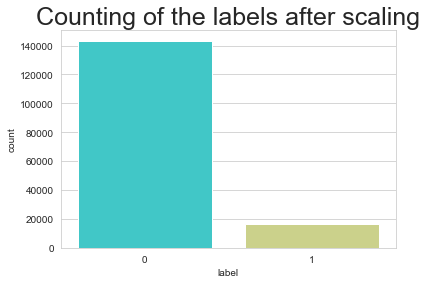

In [38]:
#Checking the counting of labels after scaling
print(df_train['label'].value_counts())
sns.countplot(df_train['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

In [39]:
#After scaling the data, we can see that 0 has more weightage and 1 has lesser weightage

#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [40]:
#Creating a column 'length_before_cleaning' in test dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


Preprocessing using NLP

In [42]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepak.mukati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
#Defining the stop words
stop_words = stopwords.words('english')

In [45]:
#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
   #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text) 

In [48]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm actual article prostitution ring c...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [49]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,ffee36eab5c267c9,spitzer umm actual article prostitution ring c...,0,0,0,0,0,0,0,81,59
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


In [50]:
#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38455580
Total Words Removed: 24437550


In [51]:
#Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [52]:
#Creating a column 'len_after_cleaning'
#It represents the length of the each comment respectively in a column 'comment_text' after cleaning the text
df_test['len_after_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning,len_after_cleaning
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [53]:
#Total length removal in test dataset
print('Original Length:',df_test.length_before_cleaning.sum())
print('Clean Length:',df_test.len_after_cleaning.sum())
print("Total Words Removed:", (df_test.length_before_cleaning.sum()) - (df_test.len_after_cleaning.sum()))

Original Length: 55885733
Clean Length: 34282033
Total Words Removed: 21603700


In [54]:
df_malignant=df_train[(df_train['malignant']==1)]
df_malignant

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,1,44,27
12,0005c987bdfc9d4b,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319,197
16,0007e25b2121310b,bye look come think comming back tosser,1,0,0,0,0,0,1,57,39
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,00190820581d90ce,fuck filthy mother dry,1,0,1,0,1,0,1,40,22
...,...,...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1050
159514,ff39a2895fc3b40e,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,ffa33d3122b599d6,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,ffb47123b2d82762,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,262


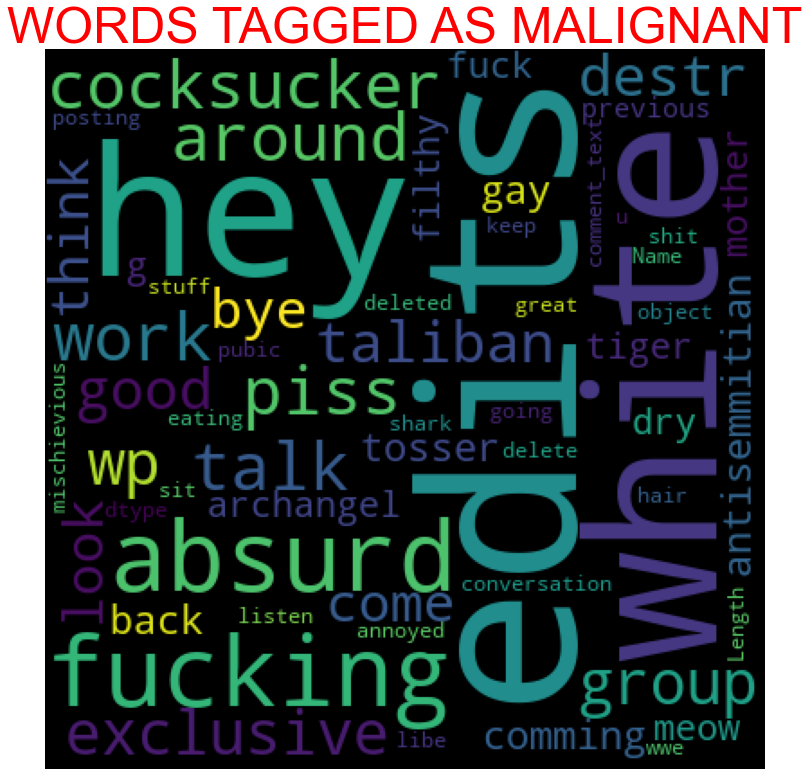

In [55]:
#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [56]:
df_highlymalignant=df_train[(df_train['highly_malignant']==1)]
df_highlymalignant

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,1,44,27
55,0020e7119b96eeeb,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
181,006e87872c8b370c,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53,29
442,01208d2b76624130,hi im fucking bitch,1,1,1,0,1,0,1,40,19
579,018663f910e0bfe6,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67,44
...,...,...,...,...,...,...,...,...,...,...,...
159096,f871b05d4caa6f20,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251,168
159099,f885a3e2d779342e,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62,46
159281,fb726deec64157bd,lol gay never know good feel fuck woman,1,1,1,0,1,1,1,87,39
159312,fbf20e312cd4a78d,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192,137


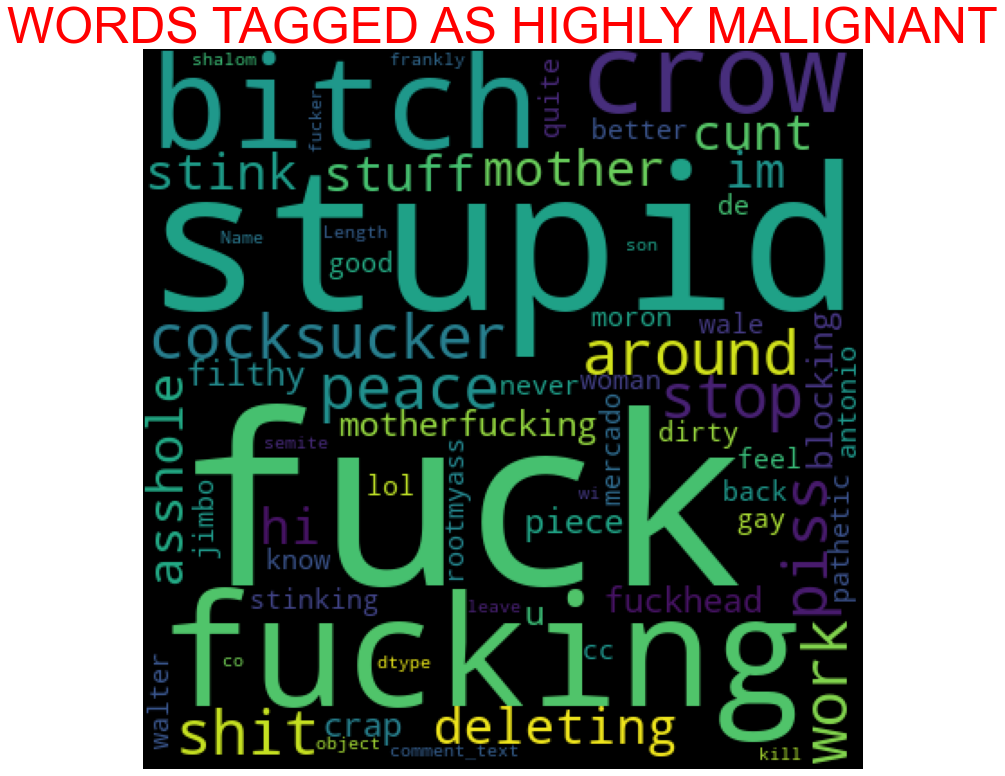

In [57]:
#Plotting for highly_malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()


In [58]:
df_rude=df_train[(df_train['rude']==1)]
df_rude

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,00190820581d90ce,fuck filthy mother dry,1,0,1,0,1,0,1,40,22
51,001dc38a83d420cf,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124,75
55,0020e7119b96eeeb,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
...,...,...,...,...,...,...,...,...,...,...,...
159411,fd2f53aafe8eefcc,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91,65
159493,fef142420a215b90,fucking faggot lolwat,1,0,1,0,1,0,1,24,21
159494,fef4cf7ba0012866,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1050
159541,ffa33d3122b599d6,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213


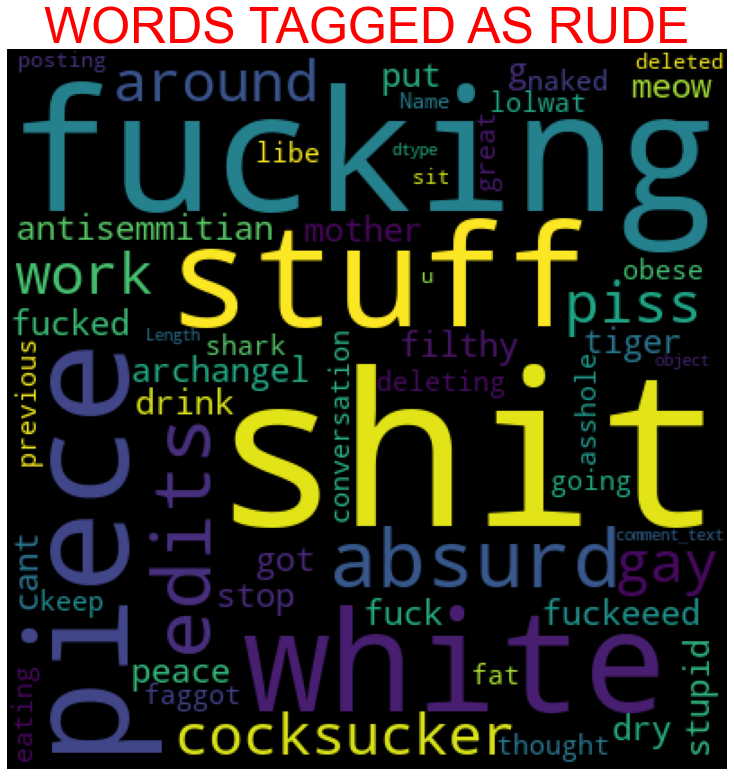

In [59]:
#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [60]:
df_threat=df_train[(df_train['threat']==1)]
df_threat

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
79,003217c3eb469ba9,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64,43
176,006b94add72ed61c,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
600,0199d6af27b715f3,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138,66
802,02230885017a50c5,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85,47
1017,02c6e41e4b317ac3,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150,75
...,...,...,...,...,...,...,...,...,...,...,...
157718,e26b106943e02cbf,bitch fucking hore suck dick big hole gay fagg...,1,0,1,1,1,1,1,316,180
158717,f264b7fb9a4b4f53,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69,48
158856,f4dca9e513e0366f,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212,124
159029,f780e4f42aa5a344,death musulmans,1,0,0,1,0,1,1,19,15


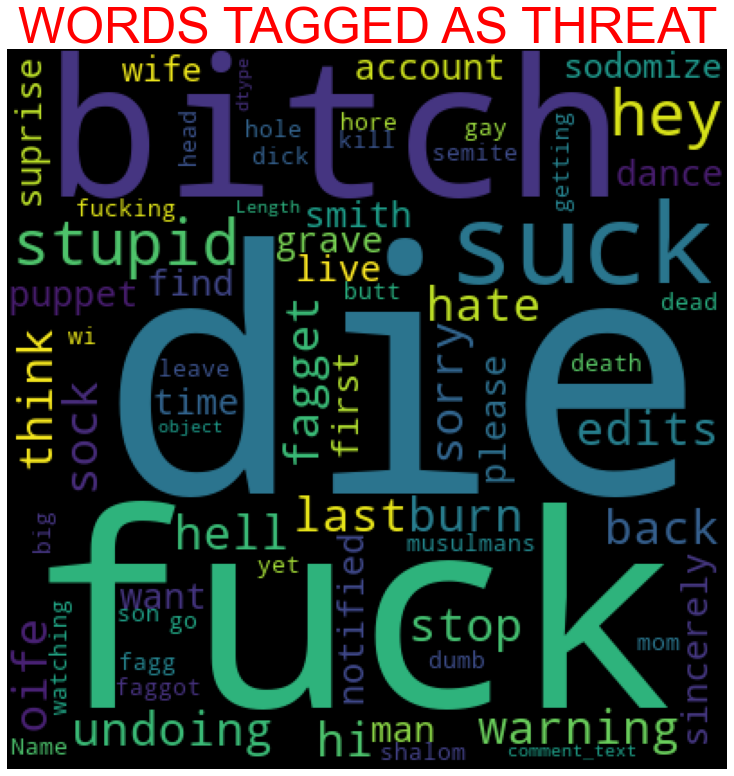

In [61]:
#Plotting for threat
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [62]:
df_abuse=df_train[(df_train['abuse']==1)]
df_abuse

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,00190820581d90ce,fuck filthy mother dry,1,0,1,0,1,0,1,40,22
55,0020e7119b96eeeb,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
56,0020fd96ed3b8c8b,tony sidaway obviously fistfuckee love arm,1,0,1,0,1,0,1,68,42
...,...,...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1050
159514,ff39a2895fc3b40e,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,ffa33d3122b599d6,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,ffb47123b2d82762,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,262


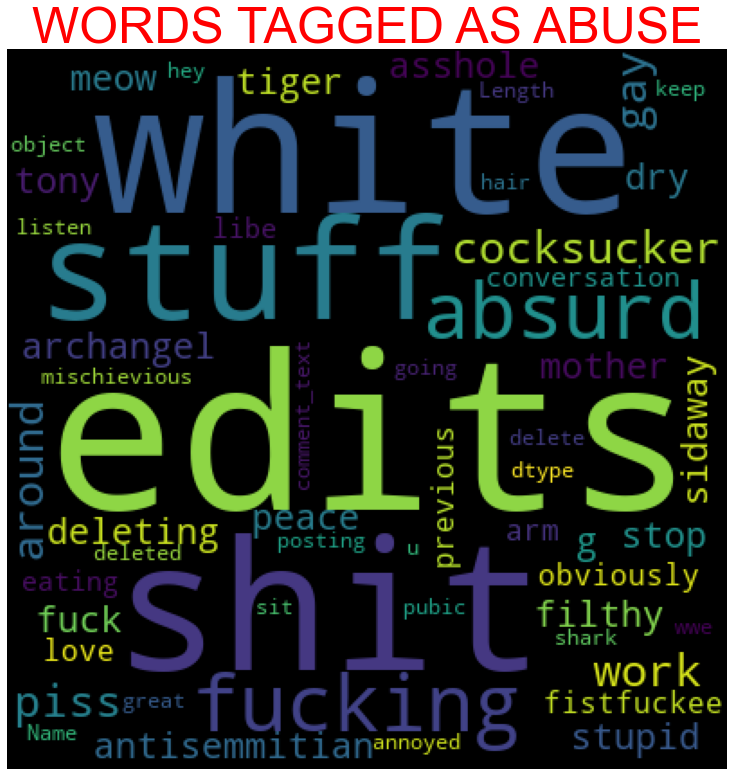

In [63]:
#Plotting for abuse
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [64]:
df_loathe=df_train[(df_train['loathe']==1)]
df_loathe

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
105,00472b8e2d38d1ea,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42,35
176,006b94add72ed61c,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
218,008e0818dde894fb,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120,58
238,0097dd5c29bf7a15,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58,51
...,...,...,...,...,...,...,...,...,...,...,...
159281,fb726deec64157bd,lol gay never know good feel fuck woman,1,1,1,0,1,1,1,87,39
159336,fc3efa2f6f025f6d,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110,64
159400,fd052883fa6a8697,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474,265
159449,fdce660ddcd6d7ca,think gay fag,1,0,0,0,0,1,1,26,13


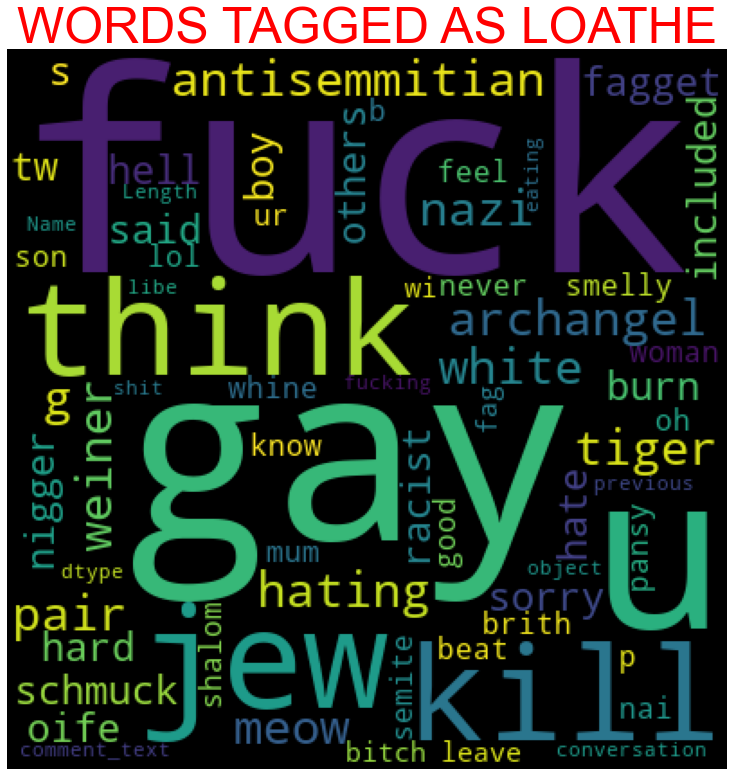

In [65]:
#Plotting for loathe
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()


In [66]:
#Separating independent and dependent variables
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])
y=df_train['label']
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(159571, 15000) 		 (159571,)


In [67]:
#Doing the above process for test data 
test_vec = tf_vec.fit_transform(df_test['comment_text'])
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2870432 stored elements in Compressed Sparse Row format>

In [68]:
test_vec.shape

(153164, 15000)

In [69]:
#Building the model
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
#Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 15000) 		 (47872, 15000)


In [70]:
#Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


In [71]:
#Handling the imbalanced data using oversampling technique
#Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
#We are trying to increase the points of minimum label data
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


In [72]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('XGBoostClassifier',xgb))

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9452498328877005


cross_val_score:  0.9560634417279064


roc_auc_score:  0.8955652651065231


Hamming_loss: 0.054750167112299464


Log_loss : 1.8910339948782617


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.83      0.76      4868

    accuracy                           0.95     47872
   macro avg       0.84      0.90      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[41195  1809]
 [  812  4056]]


AUC_ROC curve:



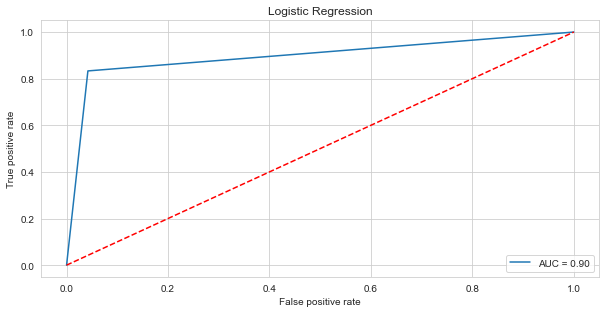





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9100935828877005


cross_val_score:  0.9466820426677206


roc_auc_score:  0.8863809806307216


Hamming_loss: 0.08990641711229946


Log_loss : 3.1053178674805504


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     43004
           1       0.54      0.86      0.66      4868

    accuracy                           0.91     47872
   macro avg       0.76      0.89      0.80     47872
weighted avg       0.94      0.91      0.92     47872



Confusion matrix: 

[[39398  3606]
 [  698  4170]]


AUC_ROC curve:



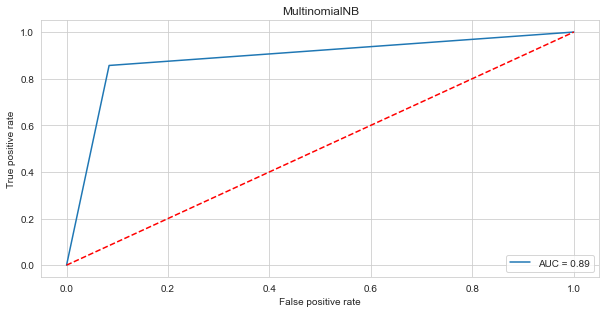





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9271181483957219


cross_val_score:  0.9407348461979191


roc_auc_score:  0.8370160880870458


Hamming_loss: 0.07288185160427807


Log_loss : 2.5172858033575194


Classification report:
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     43004
           1       0.62      0.72      0.67      4868

    accuracy                           0.93     47872
   macro avg       0.79      0.84      0.81     47872
weighted avg       0.93      0.93      0.93     47872



Confusion matrix: 

[[40859  2145]
 [ 1344  3524]]


AUC_ROC curve:



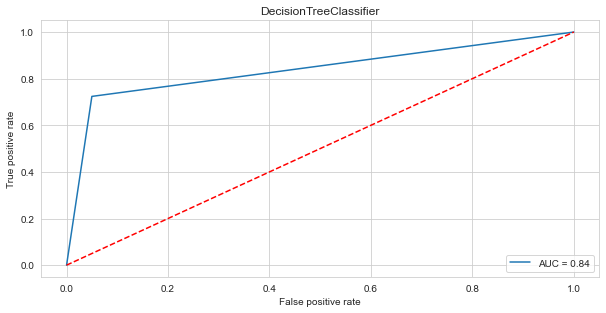





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.7577080548128342


cross_val_score:  0.9180991531849789


roc_auc_score:  0.6613838429124745


Hamming_loss: 0.24229194518716576


Log_loss : 8.368623688914408


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     43004
           1       0.22      0.54      0.31      4868

    accuracy                           0.76     47872
   macro avg       0.58      0.66      0.58     47872
weighted avg       0.86      0.76      0.80     47872



Confusion matrix: 

[[33642  9362]
 [ 2237  2631]]


AUC_ROC curve:



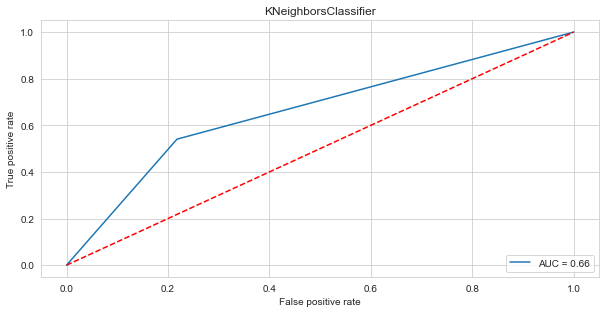





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9532712232620321


cross_val_score:  0.956827988417996


roc_auc_score:  0.8291660224303531


Hamming_loss: 0.046728776737967916


Log_loss : 1.6139655776853394


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43004
           1       0.84      0.67      0.75      4868

    accuracy                           0.95     47872
   macro avg       0.90      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[42357   647]
 [ 1590  3278]]


AUC_ROC curve:



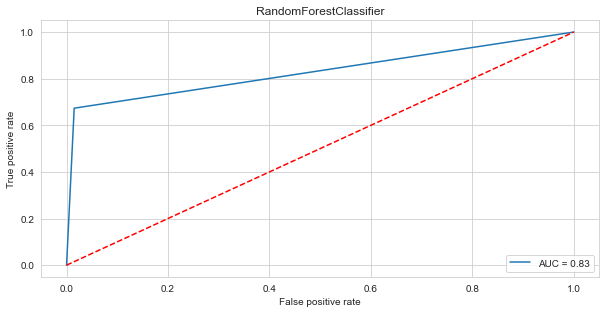





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.926992814171123


cross_val_score:  0.9457106884198252


roc_auc_score:  0.8131732046557439


Hamming_loss: 0.07300718582887701


Log_loss : 2.5216104348963055


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     43004
           1       0.63      0.67      0.65      4868

    accuracy                           0.93     47872
   macro avg       0.80      0.81      0.81     47872
weighted avg       0.93      0.93      0.93     47872



Confusion matrix: 

[[41114  1890]
 [ 1605  3263]]


AUC_ROC curve:



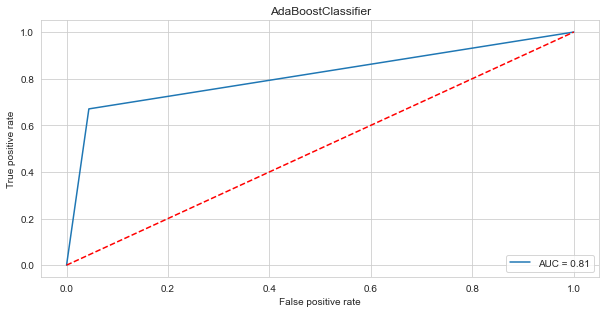





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.943829378342246


cross_val_score:  0.9402899031551494


roc_auc_score:  0.7946724892381646


Hamming_loss: 0.05617062165775401


Log_loss : 1.94007753619476


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43004
           1       0.79      0.61      0.69      4868

    accuracy                           0.94     47872
   macro avg       0.87      0.79      0.83     47872
weighted avg       0.94      0.94      0.94     47872



Confusion matrix: 

[[42226   778]
 [ 1911  2957]]


AUC_ROC curve:



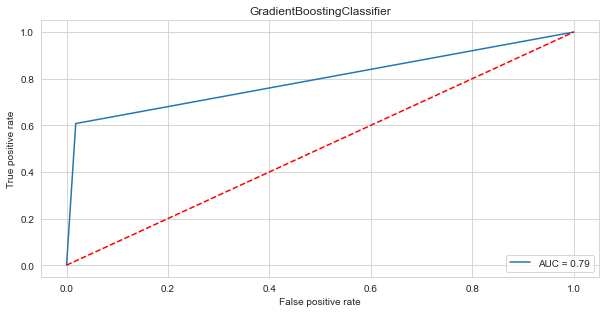





****************************** XGBoostClassifier ***************************


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


accuracy_score:  0.9488845254010695


cross_val_score:  0.9539891295472123


roc_auc_score:  0.8551428343559717


Hamming_loss: 0.05111547459893048


Log_loss : 1.7654854730895384


Classification report:
 
         

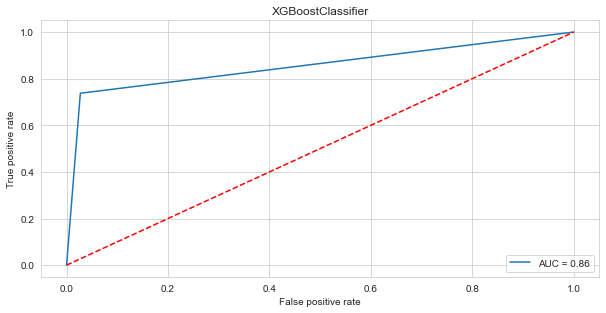

In [75]:

#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [76]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore,
                    'Hamming_loss':h_loss, 'Log_loss':l_loss})
result


,Model,Accuracy_score,Cross_val_score,roc_auc_score,Hamming_loss,Log_loss
0,Logistic Regression,94.524983,95.606344,89.556527,0.054750,1.891034
1,MultinomialNB,91.009358,94.668204,88.638098,0.089906,3.105318
2,DecisionTreeClassifier,92.711815,94.073485,83.701609,0.072882,2.517286
3,KNeighborsClassifier,75.770805,91.809915,66.138384,0.242292,8.368624
4,RandomForestClassifier,95.327122,95.682799,82.916602,0.046729,1.613966
5,AdaBoostClassifier,92.699281,94.571069,81.317320,0.073007,2.521610
6,GradientBoostingClassifier,94.382938,94.028990,79.467249,0.056171,1.940078
7,XGBoostClassifier,94.888453,95.398913,85.514283,0.051115,1.765485


In [ ]:
#Hyperparameter Tuning
#Random Forest Classifier
#Creating parameter list to pass in GridSearchCV
parameters={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'n_estimators': [50, 100, 500]}
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train_os,y_train_os)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)     

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train_os,y_train_os)

In [ ]:
pred=rfc.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(rfc,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
hloss = hamming_loss(y_test, pre)
print("Hamming_loss:", hloss)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

In [ ]:
#AUC_ROC Curve of Randomforest Classifier with oversampled data
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

In [ ]:
Finalizing the model
rfc_prediction=rfc.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':rfc_prediction})
malignant_prediction

In [ ]:
#Saving the model
import pickle
filename='MalignantCommentsClassifier_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))  
Predicting using test data
#Checking our vectorized test data
test_vec

In [ ]:
#Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier_Project.pkl','rb'))
fitted_model
RandomForestClassifier()
#Predictions
test_prediction=rfc.predict(test_vec)
test_df=pd.DataFrame({'Predictions':test_prediction})
test_df

In [ ]:
Saving the predictions
#Test predictions
test_results=pd.DataFrame(test_df)
test_results.to_csv('Malignant_TestDataPredictions.csv')
#Train predictions
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

Finally, we had predicted over the test data and the predictions obtained were saved in a csv file.

Conclusion
-> After the completion of this project, we got an insight of how to preprocess the data, analyzing the data and building a model.

-> First, we imported both training and testing data, which had nearly 150000+ records.

-> We did all the required pre-processing steps like checking null values, datatypes check, dropping unnecessary columns, etc.

-> We used the training data for doing Exploratory Data Analysis using various plots and recorded the observations.

-> While observing the results, we found that the dataset was in highly imbalanced side and we need to handle it, in order to avoid overfitting problem.

-> Using NLP, we pre-processed the comment text and did other steps like:

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

Plotting wordclod for knowing the weightage of words used

-> The above steps were done simultaneously for both training and testing data

-> As the problem was a multi-class classifier, we took a new feature known as label and combined the comment_labels output together using sum() and then stored in that feature. For a binary classification problem, we scaled the data accordingly.

-> After applying Tf-idf Vectoriser, we used an oversampling technique called RandomOverSampler for handling the imbalanced data. There, we took 75% of the high
points data and sampled it to the low points data so that both weights could be balanced equally and we could get proper result.

-> Then, we split the data using train_test_split and then we started the model building process by running as many algorithms in a for loop, with difference metrics like cross_val_score, confusion matrix, auc_score, log loss, hamming loss, etc.

-> We found that RandomForestClassifier and XGBoostClassifier were performing well. The next step was to perform hyperparameter tuning technique to these models for finding out the best parameters and trying to improve our scores.

-> The major problem with this dataset occured in this step. It took me nearly 2 hrs to run the code for finding out the best parameters itself as the dataset is large and more computational power was required. Even though we found the best algorithms, it took me 2 hrs to get the results.

-> Therefore, without hyperparameter tuning, we finalized RandomForest as the best performing algorithm by predicting the outputs, saving the model and storing the results in a csv file

-> Then, by using the model we got, another set of predictions were done by using the test data and the results were stored in a separate csv file.

Problems faced while working in this project:
More computational power was required as it took more than 2 hours

Imbalanced dataset and bad comment texts

Good parameters could not be obtained using hyperparameter tuning as time was consumed more

Areas of improvement:
Could be provided with a good dataset which doesnot take more time.

Less time complexity

Providing a proper balanced dataset with less errors.
 My point of view from my project is that we need to use proper words which are respectful and also avoid using abusive, vulgar and worst words in social media. It can cause many problems which could affect our lives. Try to be polite, calm and composed while handling stress and negativity and one of the best solution is to avoid it and overcoming in a positive manner.